In [431]:
import pandas as pd
import numpy as np

# Data Collection

In [432]:
# # Load the dataset
# url = 'adult/adult.data'
# url2 = 'adult/adult.test'
# column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
#                 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
# data = pd.read_csv(url , names=column_names, na_values=' ?')
# data2 = pd.read_csv(url2 , names=column_names, na_values=' ?')
# data2 = data2.iloc[1:]
# 
# # Concatenate the datasets
# data1 = pd.concat([data1, data2])
# 
# # Reset index
# data1.reset_index(drop=True, inplace=True)
# 
# # Display the first few rows of the combined dataframe
# print(data.head())
# print(len(data))

In [433]:
#read data from data set 
data1 = pd.read_csv("adult/adult.data",header = None)
data2 = pd.read_csv("adult/adult.test", header = None, skiprows=1)
data = pd.concat([data1,data2])

#adding columns name from given that in adult.names file 
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#preview first five data rows from data set
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,?,?,77516,Bachelors,?,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing

# Handling Duplicate Values

In [434]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Print duplicate row count
print("Duplicate Row Count:", len(duplicate_rows))

# Remove duplicate rows
data.drop_duplicates(inplace=True)
print((data))

Duplicate Row Count: 29
      age          workclass  fnlwgt   education education-num  \
0       ?                  ?   77516   Bachelors             ?   
1      50   Self-emp-not-inc   83311   Bachelors            13   
2      38            Private  215646     HS-grad             9   
3      53            Private  234721        11th             7   
4      28            Private  338409   Bachelors            13   
...    ..                ...     ...         ...           ...   
16276  39            Private  215419   Bachelors            13   
16277  64                  ?  321403     HS-grad             9   
16278  38            Private  374983   Bachelors            13   
16279  44            Private   83891   Bachelors            13   
16280  35       Self-emp-inc  182148   Bachelors            13   

            marital-status          occupation     relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married-civ-spouse     Exec-managerial   

# Handling Missing Values

In [435]:
#replacing " ?" with "Nan"
data.replace(' ?', pd.NA, inplace=True)

In [436]:
# Impute missing values with the most frequent value (mode) for categorical features
for col in ['workclass', 'occupation', 'native-country', 'education']:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
    # Impute missing values with the median for numerical features # Impute missing values with the median for numerical features   
for col in ['education-num', 'age']:
    data[col].fillna(data[col].median(), inplace=True)

# Drop rows with missing values in other columns
data.dropna(inplace=True)
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37.0,Private,77516,Bachelors,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Removing spaces in each data

In [437]:
#run a loop and remove bank spaces in object type values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.strip(' ')

# Data consistency

In [438]:
category_counts = data.apply(lambda x: x.nunique())

print("Number of categories in each column:")
print(category_counts)

Number of categories in each column:
age                  73
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                4
dtype: int64


In [439]:
# Replace '.' with an empty string in the 'income' column
data['income'] = data['income'].str.replace('.', '')

category_counts = data.apply(lambda x: x.nunique())

print("Number of categories in each column:")
print(category_counts)

Number of categories in each column:
age                  73
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64


In [440]:
#printing unique values of each column
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age
[nan '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40' '34'
 '25' '43' '54' '35' '59' '56' '19' '39' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87']


workclass
['Private' 'Self-emp-not-inc' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[nan '13' '9' '7' '14' '5' '10' '12' '11' '4' '16' '15' '3' '6' '2' '1'
 '8']


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerica

# Summary statistics

In [441]:
# Calculate descriptive statistics
descriptive_stats = data.describe()

# Print the descriptive statistics for numerical data
print(descriptive_stats)

             fnlwgt  capital-gain  capital-loss  hours-per-week
count  4.881300e+04  48813.000000  48813.000000    48813.000000
mean   1.896679e+05   1079.708705     87.554299       40.425051
std    1.056062e+05   7454.185982    403.118605       12.390954
min    1.228500e+04      0.000000      0.000000        1.000000
25%    1.175550e+05      0.000000      0.000000       40.000000
50%    1.781400e+05      0.000000      0.000000       40.000000
75%    2.376200e+05      0.000000      0.000000       45.000000
max    1.490400e+06  99999.000000   4356.000000       99.000000


# Visualization

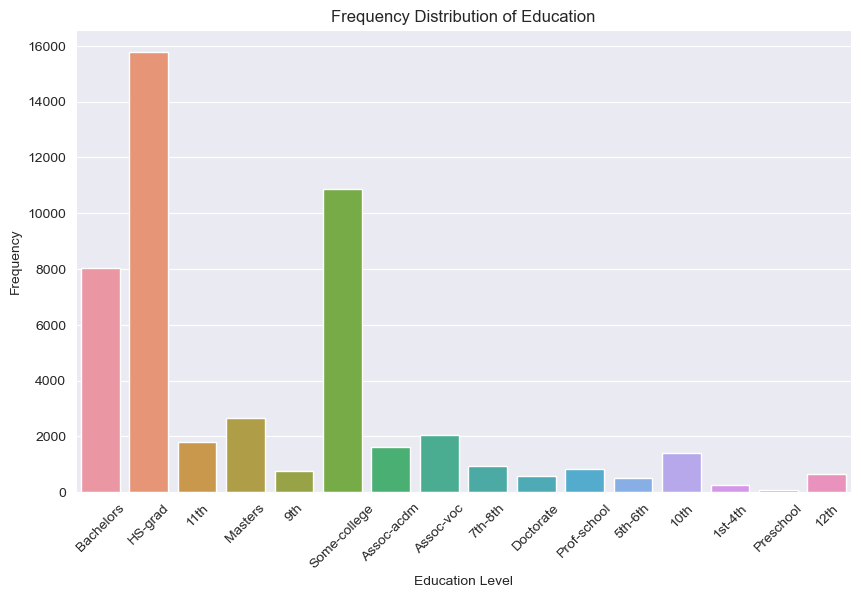

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plots for selected categorical features
plt.figure(figsize=(10, 6))

# Example: Plotting frequency distribution of 'education' feature
sns.countplot(x='education', data=data)
plt.xticks(rotation=45)  # Angle x-axis labels for better readability
plt.title('Frequency Distribution of Education')
plt.xlabel('Education Level')   
plt.ylabel('Frequency')
plt.show()

In [443]:
#getting the count for each education category
Education_data=data['education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=data['education-num'].value_counts()
order2= list(EducationNum_data.index)

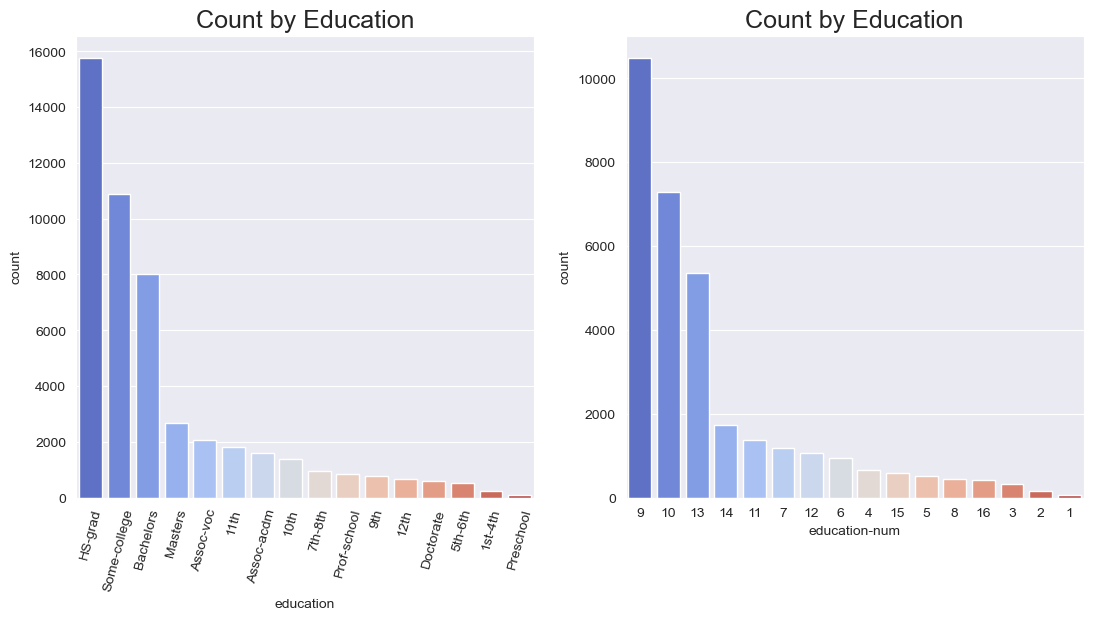

In [444]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=data, x='education', order=order1, palette ='coolwarm')
plt.title('Count by Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=data, x='education-num', order=order2, palette = 'coolwarm')
plt.title('Count by Education', fontsize=18);

Education column and education-num column consist with same information

In [445]:
data.drop('education', axis=1, inplace=True)
#data.drop('fnlwgt', axis=1, inplace=True)

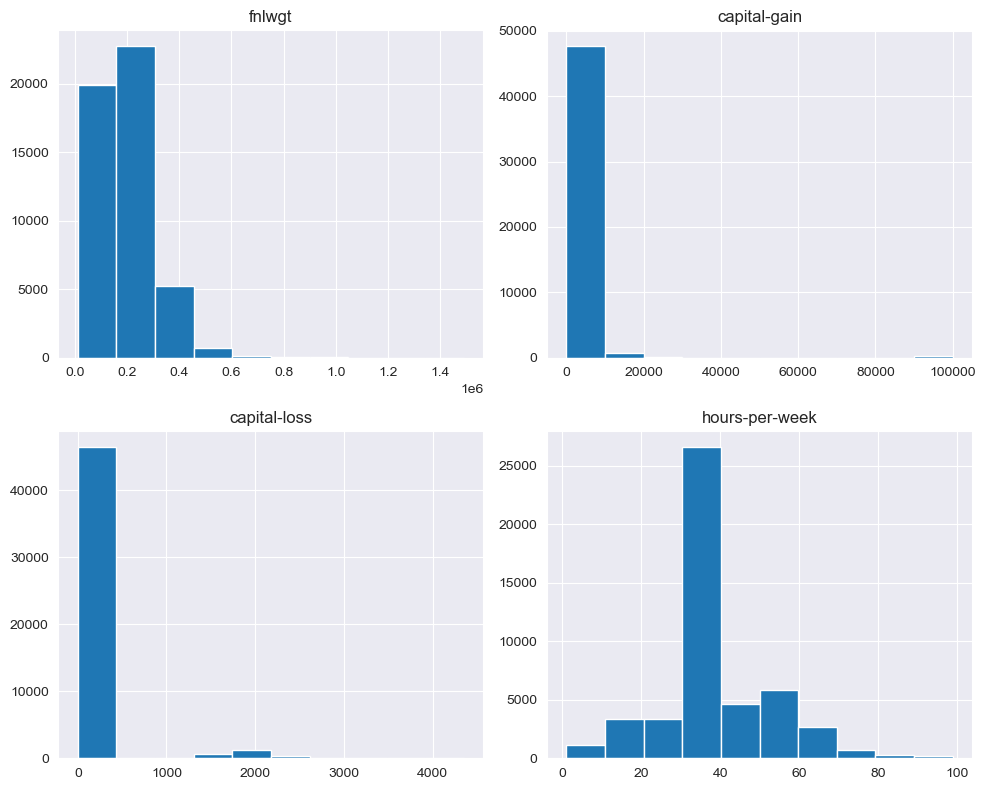

In [446]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [447]:
# getting the count for each country in 'native-country' column
native_country_counts = data["native-country"].value_counts()
native_country_counts

native-country
United-States                 44666
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

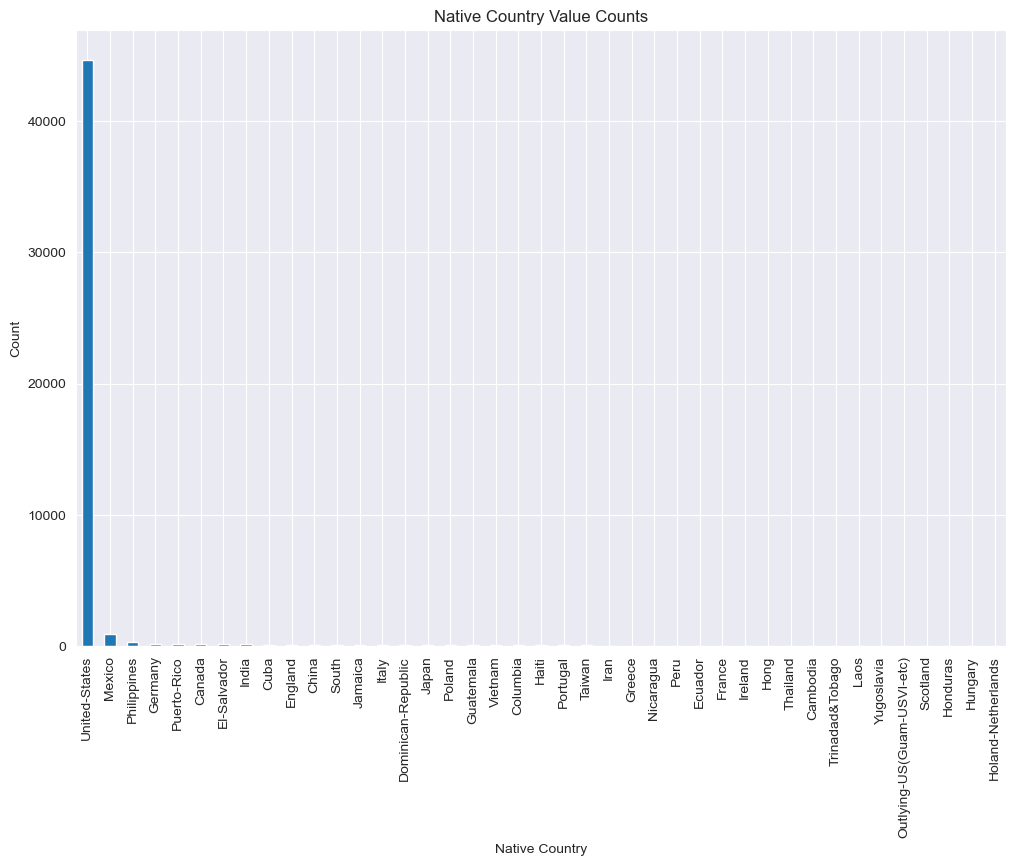

In [448]:
# Plotting the count for each country in 'native-country' column
plt.figure(figsize=(12, 8))
native_country_counts.plot(kind='bar')
plt.title('Native Country Value Counts')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

# Encoding categorical variables

In [449]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables by replacing the categorical values with numerical labels
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

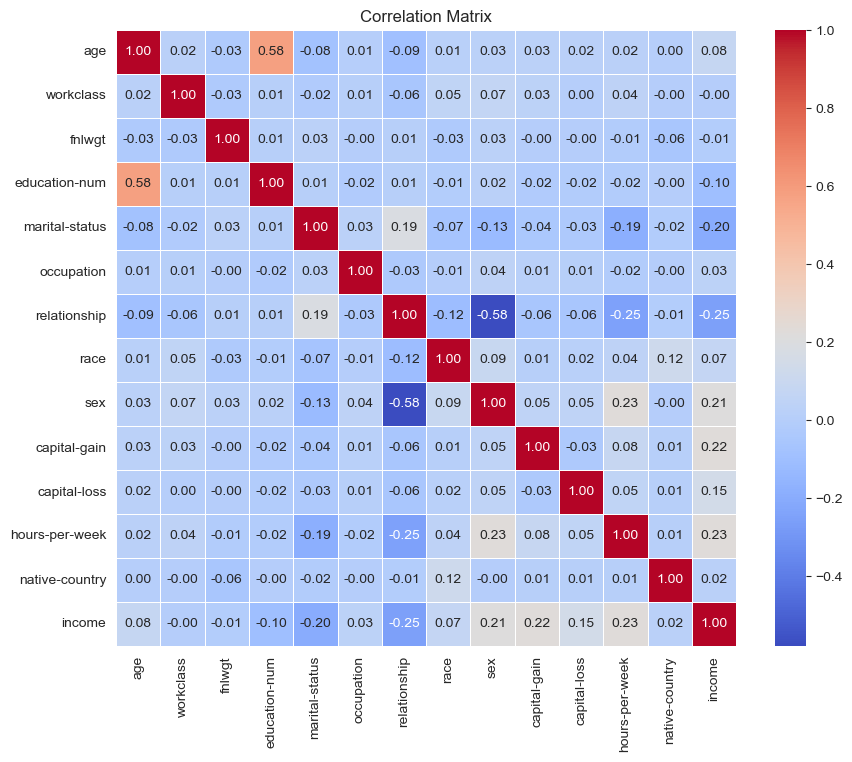

In [450]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap with contrasting colors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Data Splitting

In [451]:
# Split data into features and target
X = data.drop('income', axis=1)
y = data['income']

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [452]:
from sklearn.naive_bayes import GaussianNB
# Step 2: Model Training
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [453]:
from sklearn.model_selection import cross_val_score

# Assuming model is your machine learning model
# X is your feature matrix, and y is your target variable

# Perform k-fold cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(nb_model , X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.7927891  0.79770562 0.79330124 0.79870928 0.79112887]
Mean CV score: 0.7947268224551454
Standard deviation of CV scores: 0.002948408433704057


Naïve Bayes Accuracy: 0.7914575437877701
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      7375
           1       0.65      0.31      0.42      2388

    accuracy                           0.79      9763
   macro avg       0.73      0.63      0.65      9763
weighted avg       0.77      0.79      0.76      9763


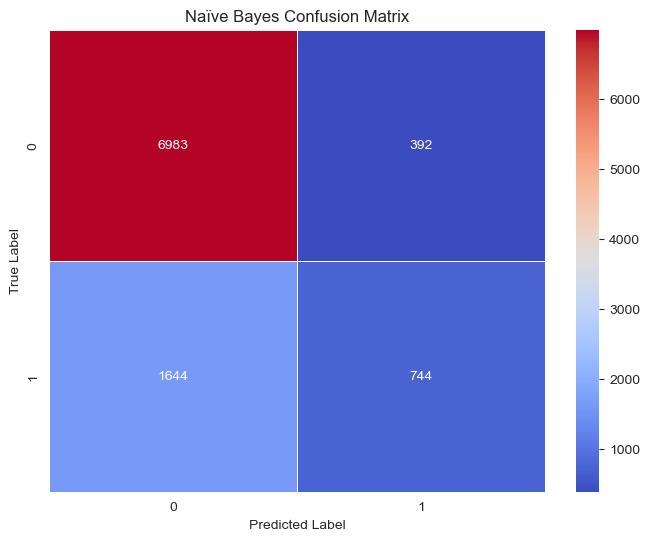

In [398]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Step 3: Model Evaluation
# Evaluate Naïve Bayes model
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_pred))
# print("Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix as a heatmap with contrasting colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Random Forest Accuracy: 0.8448222882310765
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7375
           1       0.71      0.61      0.66      2388

    accuracy                           0.84      9763
   macro avg       0.80      0.77      0.78      9763
weighted avg       0.84      0.84      0.84      9763


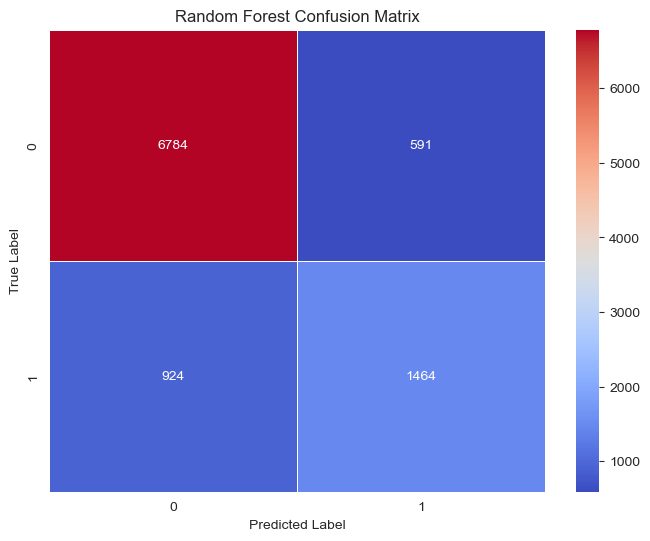

In [399]:
# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
#print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix as a heatmap with contrasting colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [400]:
# Step 4: Model Comparison
print("\nModel Comparison:")
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Model Comparison:
Naïve Bayes Accuracy: 0.7914575437877701
Random Forest Accuracy: 0.8448222882310765


# PCA(Experimental Results)

In [401]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns=["income"]))

PCA()

In [402]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance :", num_components)

Number of components to capture 95% of variance : 1


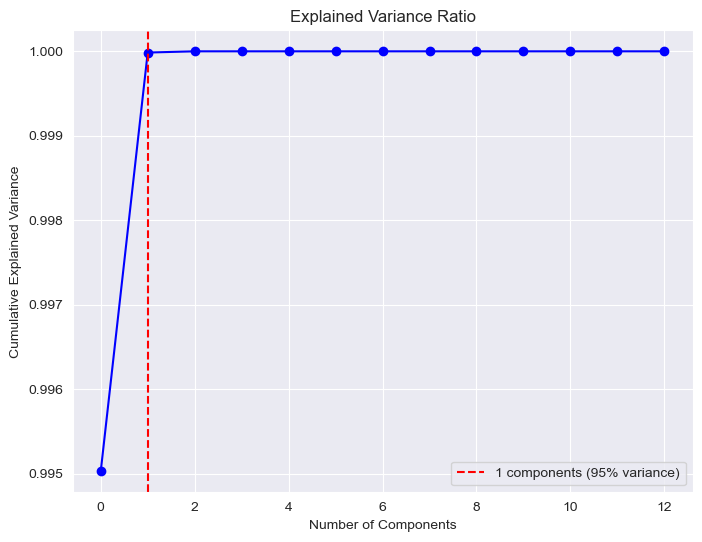

In [403]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x= num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

In [404]:
pca = PCA(n_components=9)
new_data = pca.fit_transform(data)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])

In [405]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-112152.188030,1064.908374,-87.565972,-33.932007,-0.932465,-1.194239,-1.196567,-6.097089,0.500613
1,-106356.615363,-1107.569471,-91.276039,7.343253,-27.002203,-1.358338,5.943200,-3.630833,-2.661005
2,25978.380070,-1072.718393,-88.977312,16.546190,0.077377,-1.661903,-6.689842,-0.748808,-2.227815
3,45053.379301,-1067.693790,-88.628565,1.838945,-0.001773,-1.698862,-2.657811,-0.951054,-1.564446
4,148741.375971,-1040.391307,-86.885486,27.166871,0.204542,31.933759,3.216229,2.573987,2.521515


In [406]:
X = principal_Df
y = data["income"]

In [407]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [408]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     12318
           1       0.65      0.31      0.42      3953

    accuracy                           0.79     16271
   macro avg       0.73      0.63      0.65     16271
weighted avg       0.77      0.79      0.76     16271

Accuracy: 0.7923913711511278

Random Forest Model:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12318
           1       0.79      0.57      0.67      3953

    accuracy                           0.86     16271
   macro avg       0.83      0.76      0.79     16271
weighted avg       0.85      0.86      0.85     16271

Accuracy: 0.8599348534201955
